# Linear Regression

*Author:* Github - @wklchris

*Feb 2019*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Introduction

A general linear regression may follow these steps:

1. Pre-part:
    1. Choice of the response variable
    2. Dealing with categorical variables
2. Variables check
    1. Skewness of the response variable; Box-cox. Transformation might be needed.
    2. Pairwise scatterplot (correlation matrix) check
3. Model fitting & selection
    1. Initial model with all variables
    2. Variables selection: via e.g. best subset methods, AIC, etc.
    3. Interpretation
4. Model Diagnostics
    1. Linearity: square-root of studentized residuals vs fitted values plot
    2. Equal-variance: residual vs fitted value plot
    3. Normality: Q-Q plot
    4. Outlier influences: Cooks' distance < 1

The example below is a simplified one and many steps are skipped.

## Data generation (1-D regression)

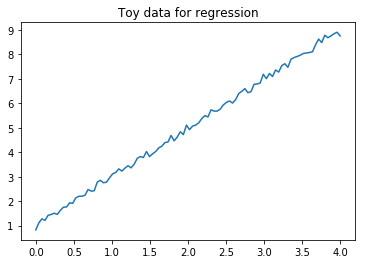

In [37]:
n = 100
x = np.linspace(0, 4, n)

np.random.seed(100)
y = 2 * x + np.random.normal(1, 0.1, n) # Noise: mu=1, sigma=0.1
x, y = x.reshape(n, -1), y.reshape(n, -1)

plt.plot(x, y)
plt.title("Toy data for regression")
plt.show()

## Fitting

In [75]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(x, y)
y_fit = regr.predict(x)

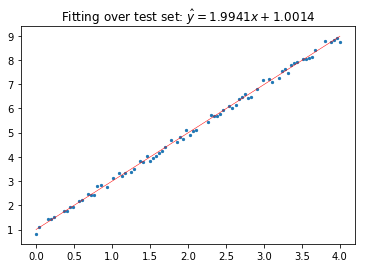

In [64]:
plt.scatter(x_train , y_train, s=5)
plt.plot(x , y_fit, color='r', lw=0.5)
plt.title("Fitting over test set: $\hat{{y}}={:.4f}x + {:.4f}$".format(
           regr.coef_[0][0], regr.intercept_[0]))
plt.show()

## Metrics: SS and R-square

Error sum of squares (SSE) is given by the SS of true values and fitted values:

$$ SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2, \quad MSE = \frac{SSE}{n-2} $$

The `mean_squared_error` function returns the MSE (with denominator $n$) of 2 inputs.

**Note: the denominator of SSE in `scikit-learn` is $n$, while in the linear regression theory it should be $n-2$**.

In [78]:
from sklearn.metrics import mean_squared_error

sse = mean_squared_error(y, y_fit) * n  # Denominator n-2 in theory
print("SSE = {:.6f}".format(sse))

SSE = 0.935695


In [82]:
np.sum(np.square(y - y_fit))

0.9356948460632205

In [87]:
from math import isclose

# The denominator in the function is $n$ but not $n-2$
isclose(sse, mean_squared_error(y, y_fit) * (n-2))

False

$R^2$, a.k.a coefficient of determinanion, is given by:

$$ R^2 = \frac{SSR}{SSTO} $$

where the calculation of $SSR$ is described at 'SSR' section. 

From definition we have $R^2\in [0,1]$. And the larger $R^2$ is, the higher degree of linear association there is between $x$ and $y$.

In [66]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_fit)
print("R-square: {:.6f}".format(r2))

R-square: 0.998273


We also know regression sum of squares (SSR) and total sum of squares (SSTO):

$$
SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2,\quad
SSTO = \sum_{i=1}^n (y_i - \bar{y})^2 = SSE + SSR
$$

So we can also check it by computation based on these formula (**Note: denominators for MSR and MSTO are $1$ and $n-1$,  respectively**):

In [88]:
y_mean = np.full((n, 1), np.mean(y))
ssr = mean_squared_error(y_mean, y_fit) * n  # Denominator 1 in theory
ssto = mean_squared_error(y_mean, y) * n  # Denominator n-1 in theory
print("R-square by formula: {:.6f}".format(ssr / ssto))

R-square by formula: 0.998273
